## 3- Modeling

In [0]:
# Essentials
import numpy as np 
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Models
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Importing feature engineering library
from feature_engine import categorical_encoders as ce

# Misc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import json

In [2]:
df = pd.read_csv('/content/Apartements_clean.csv', index_col='Unnamed: 0')
df.head()

,neighborhood,rent,beds,baths
0,"Rose Hill, Kips Bay, Midtown Manhattan, Manhattan",3500,2,1.0
1,"Upper East Side, Upper Manhattan, Manhattan",5795,3,2.0
2,"Hell's Kitchen, Midtown Manhattan, Manhattan",2225,0,1.0
3,"Chelsea, Midtown Manhattan, Manhattan",5030,1,1.0
4,"Hunters Point, Long Island City, Northwestern ...",3559,1,1.0


In [0]:
# Splitting the data into features and a label
X = df.drop('rent', axis=1)
y = pd.DataFrame(df['rent'])

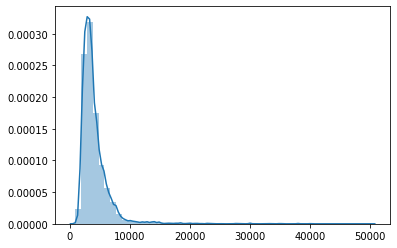

In [4]:
# Visualizing the rent's distribution
sns.distplot(y)

In [0]:
# Applying log1p transformation on rent
y = np.log1p(y)

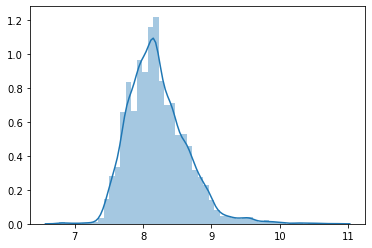

In [6]:
# Visualizing the rent's distribution after the transformation
sns.distplot(y)

In [0]:
# Mean encoding the neighborhood variable
encoder = ce.MeanCategoricalEncoder(variables=['neighborhood'])
encoder.fit(X, y)
X = encoder.transform(X)

In [8]:
# Checking if data is ready for modeling
X.head()

,neighborhood,beds,baths
0,8.095965,2,1.0
1,8.164518,3,2.0
2,8.238463,0,1.0
3,8.427111,1,1.0
4,8.162959,1,1.0


In [0]:
# Defining model
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [0]:
# Setup cross validation folds
kf = KFold(n_splits=6, random_state=42, shuffle=True)

In [0]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [12]:
# Checking model performance
score = cv_rmse(xgboost)
print("Average rmse: {:.4f}. Standard deviation: {:.4f}".format(score.mean(), score.std()))

Average rmse: 0.2070. Standard deviation: 0.0065


In [13]:
# Fitting the model
xgb_fitted = xgboost.fit(X, y)
print('Model fitted.')

Model fitted.


In [14]:
# Saving the model
xgb_fitted.save_model('model.bin')
print("model saved")

model saved


In [15]:
# Saving encoding dictionary
encoding = encoder.encoder_dict_
json = json.dumps(encoding)
f = open("dict.json","w")
f.write(json)
f.close()
print("encoding saved")

encoding saved
